# Линейная регрессия. Практика

## Небольшое напоминание

$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ $-$ целевая переменная (что мы хотим предсказать), $x_i$ $-$ признак объекта $х$, $w_i$ $-$ вес $i$-го признака, $b$ $-$ bias (смещение, свободный член)

**Лосс:** 
$$
\begin{aligned}
L(y_{pred}, Y) &= \frac{1}{n}||y_{pred} - Y||^2_2 =\\
&= \frac{1}{n}||Xw - Y||^2_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 = L(w)
\end{aligned}
$$

Минимизация ошибки по методу наименьших квадратов дает решение: $$ w = (X^TX)^{-1}X^TY $$

## Практика

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.datasets import fetch_california_housing

In [3]:
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"] = 14

In [4]:
features, target = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### EDA

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
features.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
features.shape[0] == target.shape[0]

True

In [9]:
features.shape

(20640, 8)

In [10]:
median_age = np.median(features["HouseAge"])
median_age

29.0

In [11]:
target_old = target[features["HouseAge"] > median_age]
target_new = target[features["HouseAge"] <= median_age]

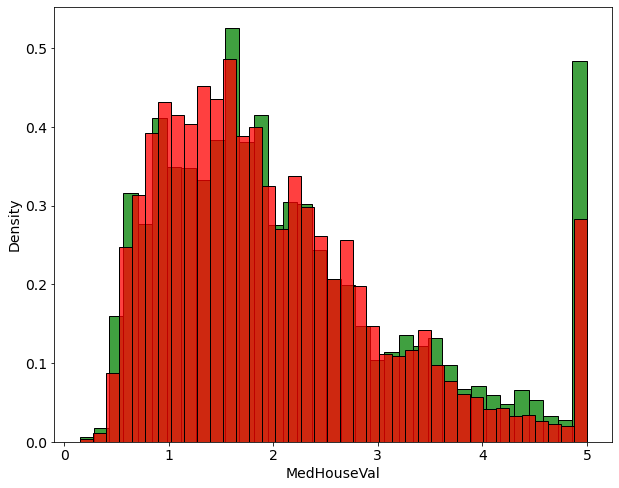

In [12]:
sns.histplot(target_old, stat="density", color="green")
sns.histplot(target_new, stat="density", color="red");

In [13]:
ttest_ind(target_old, target_new)

Ttest_indResult(statistic=9.86161086213435, pvalue=6.860977593834087e-23)

In [14]:
mannwhitneyu(target_old, target_new)

MannwhitneyuResult(statistic=56256586.0, pvalue=7.581604483326754e-13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


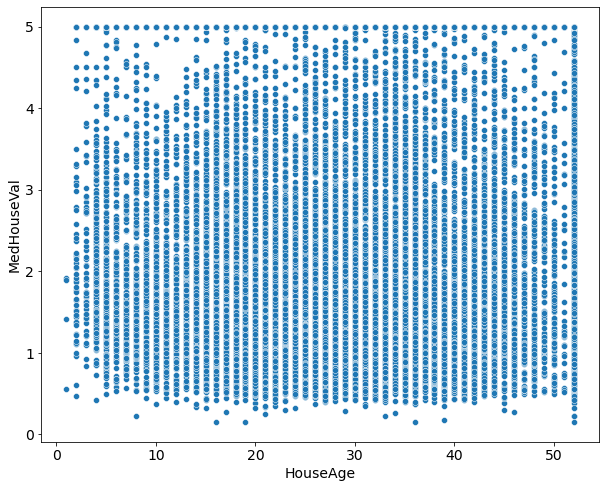

In [15]:
sns.scatterplot(features["HouseAge"], target);

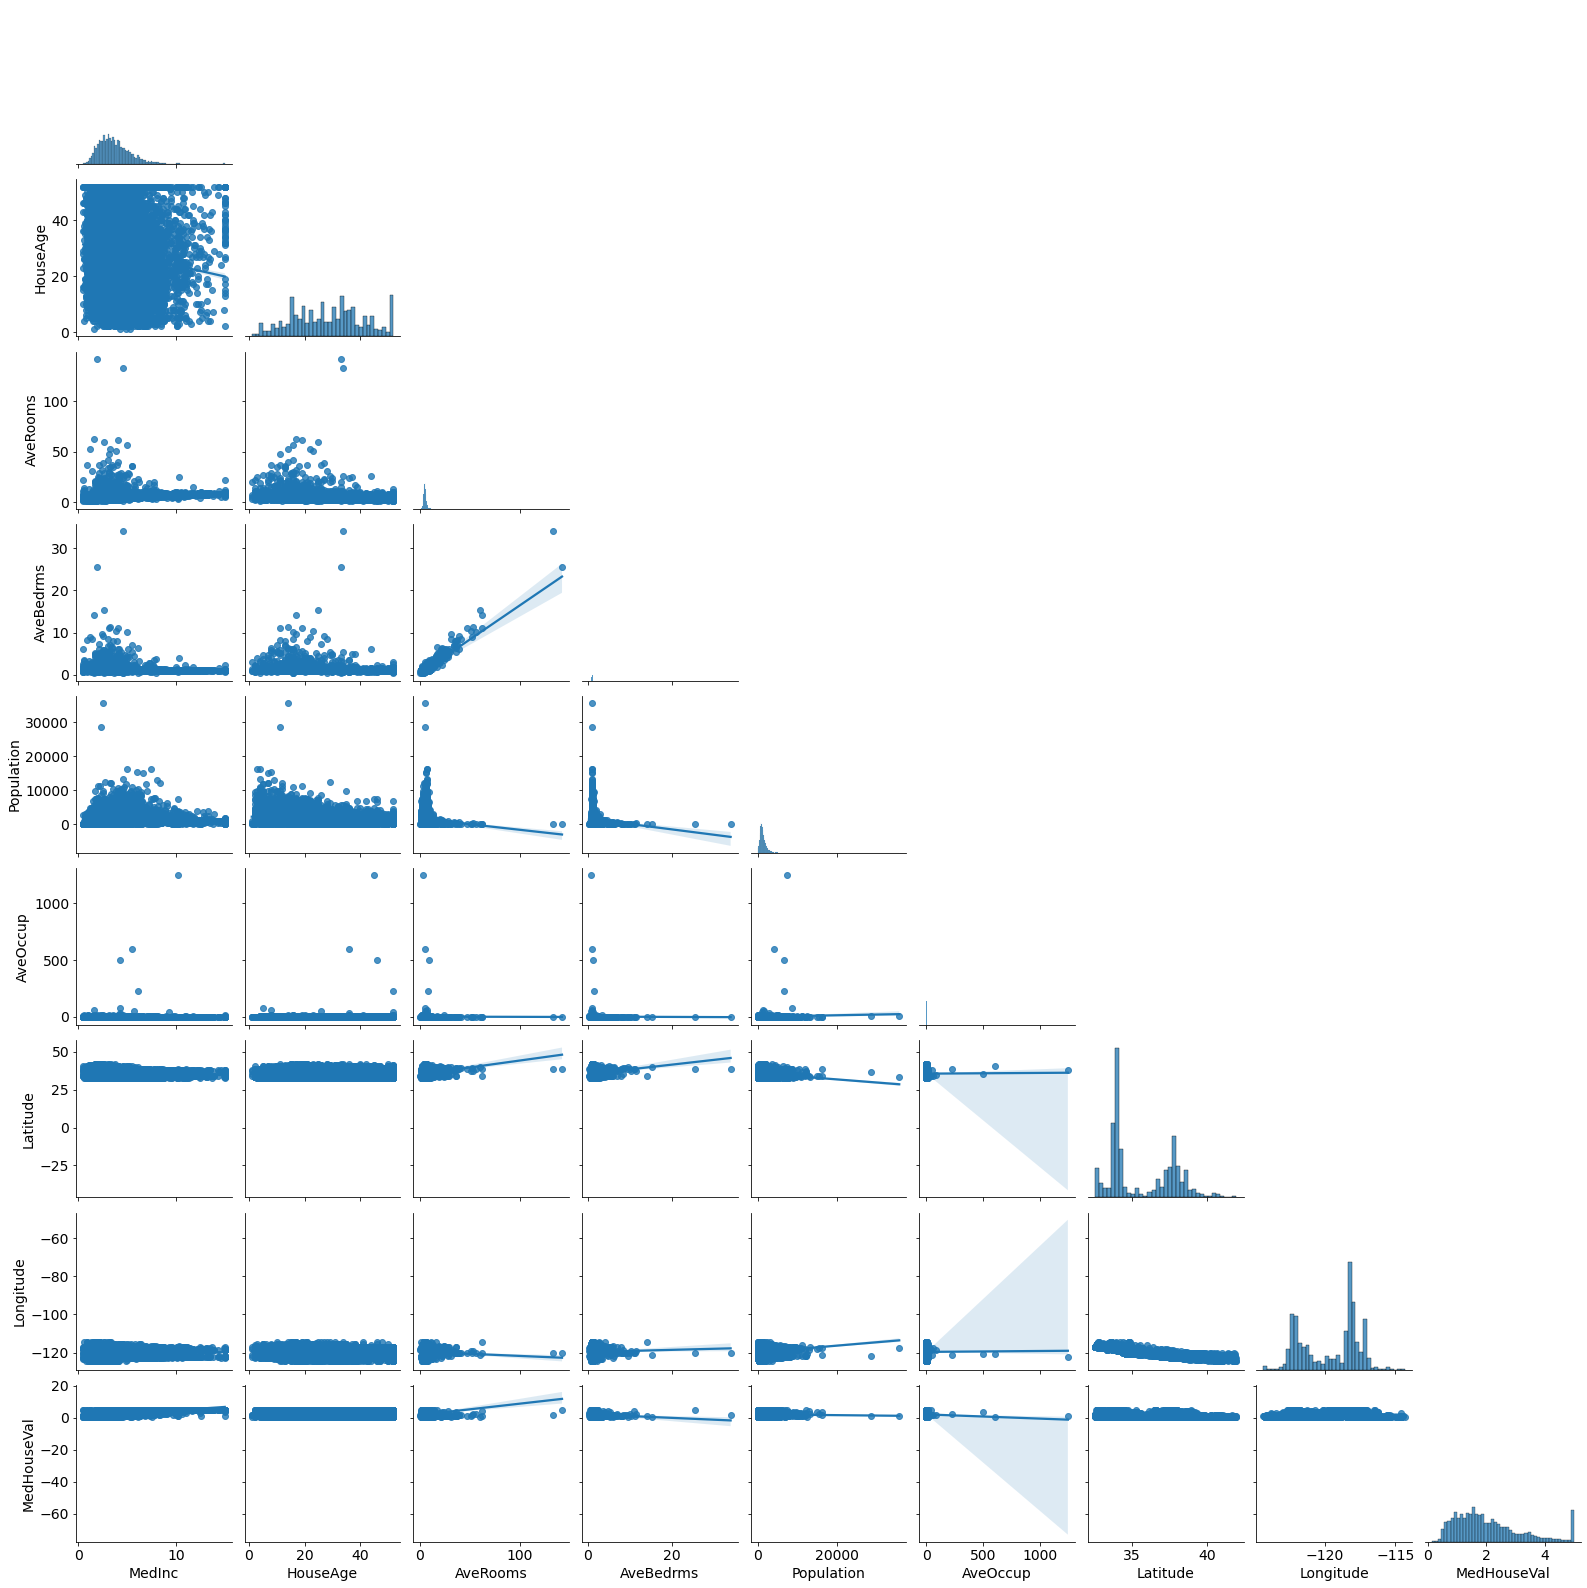

In [16]:
sns.pairplot(pd.concat([features, target], axis=1), kind="reg", corner=True);

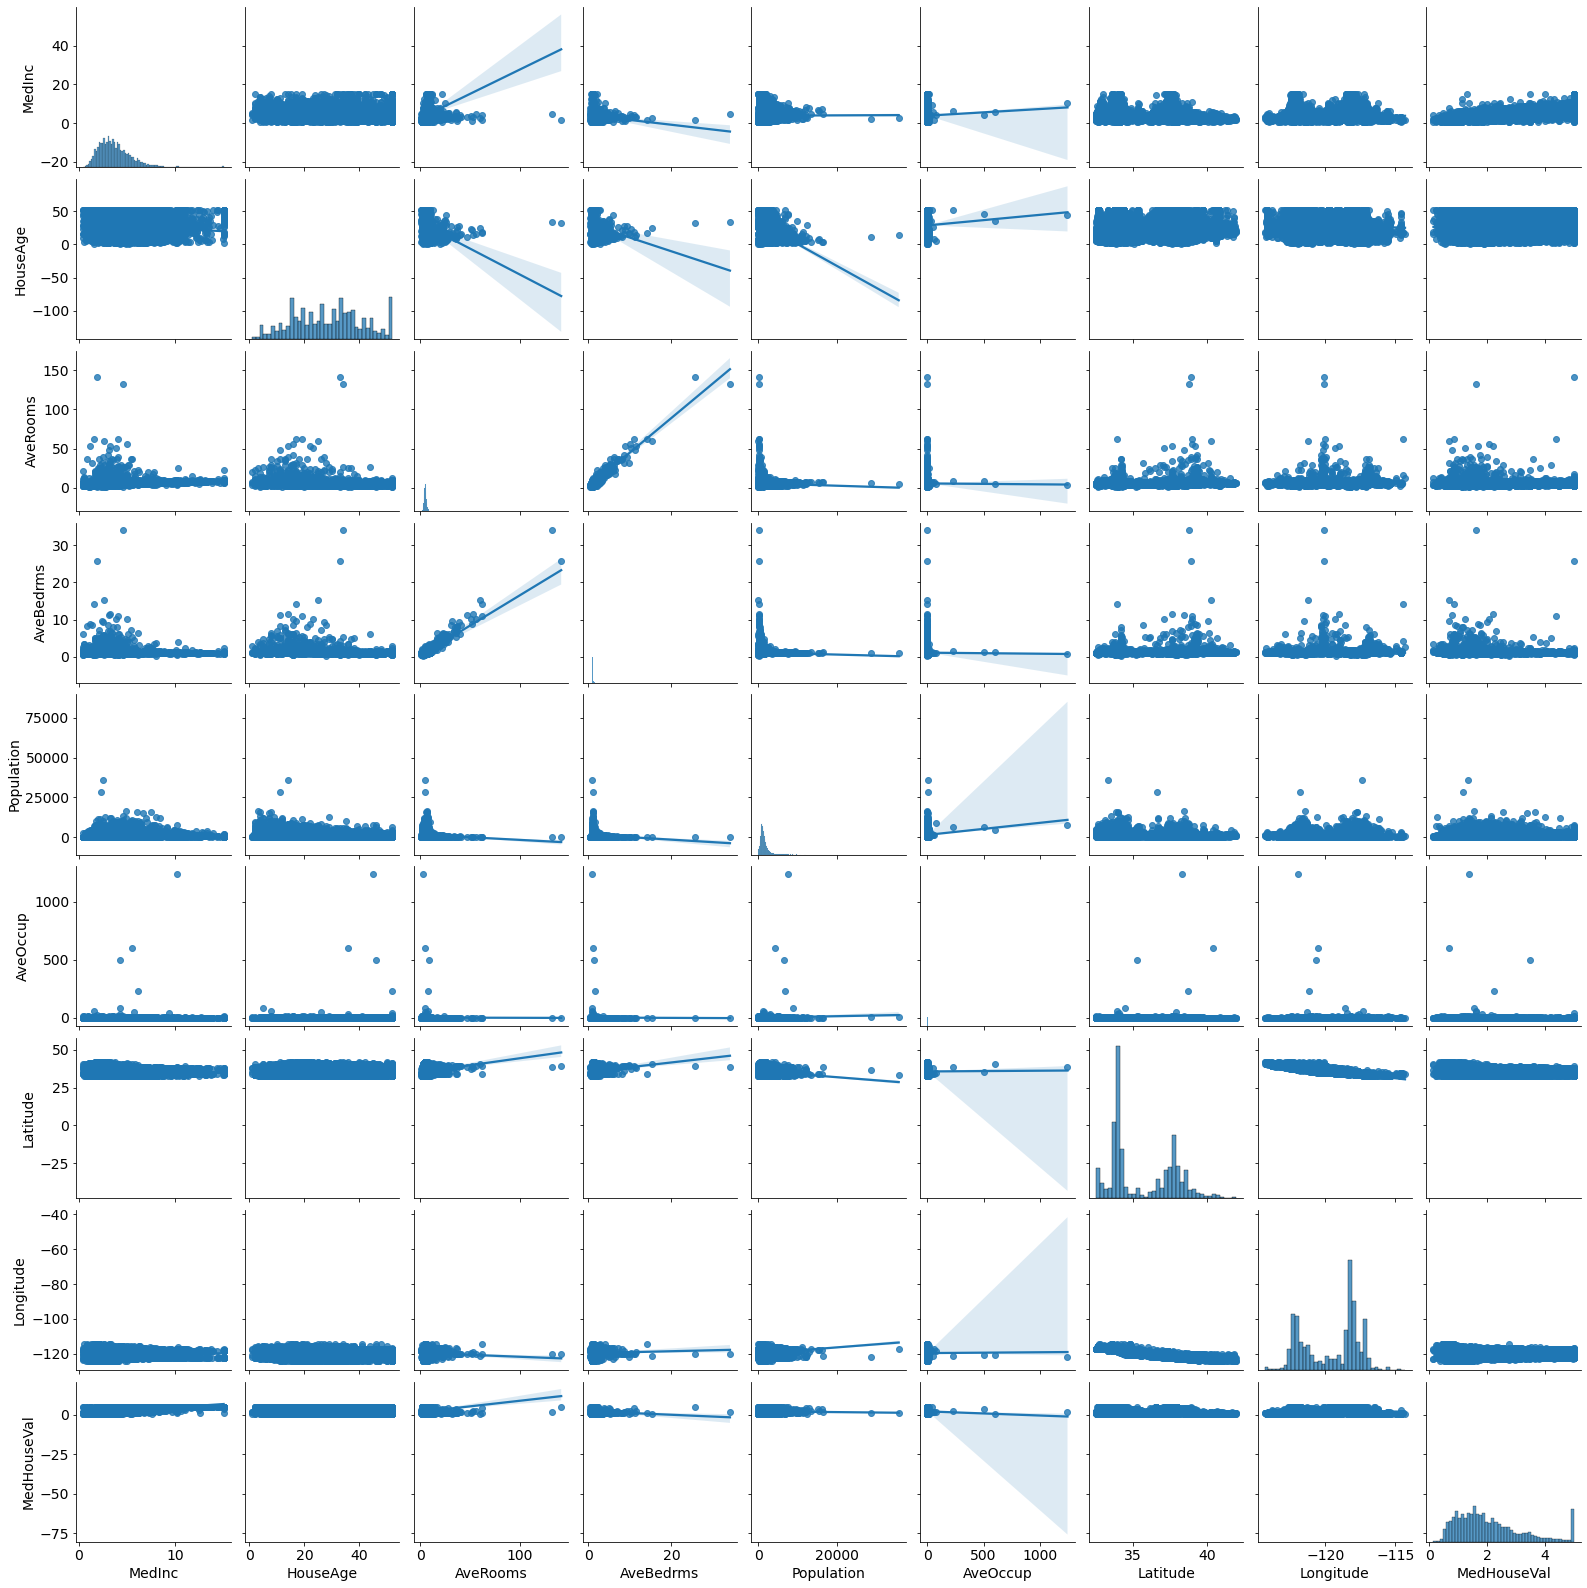

In [17]:
sns.pairplot(pd.concat([features, target], axis=1), kind="reg");

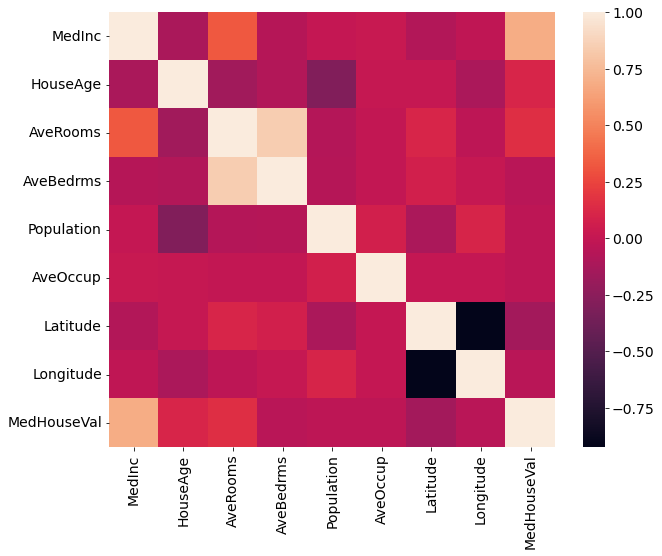

In [18]:
sns.heatmap(pd.concat([features, target], axis=1).corr());

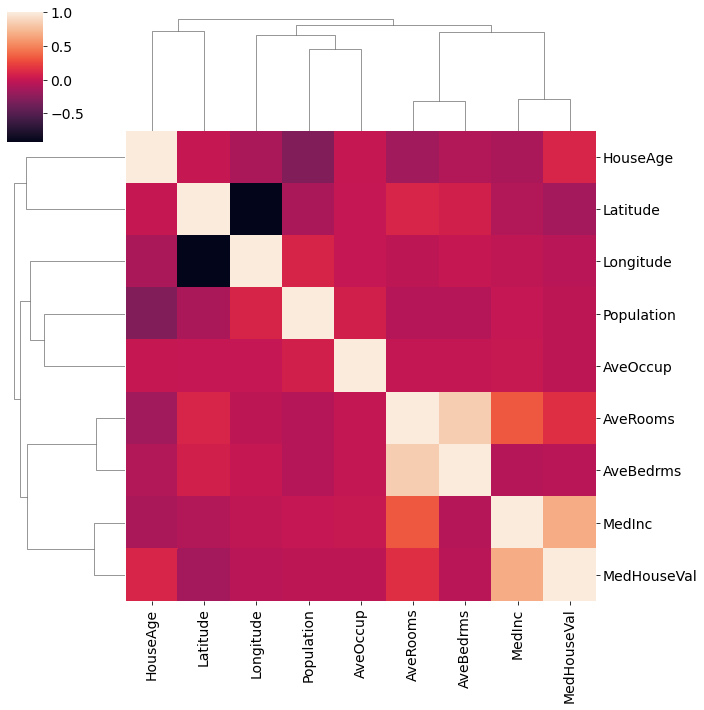

In [19]:
sns.clustermap(pd.concat([features, target], axis=1).corr());

In [20]:
pd.concat([features, target], axis=1).corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


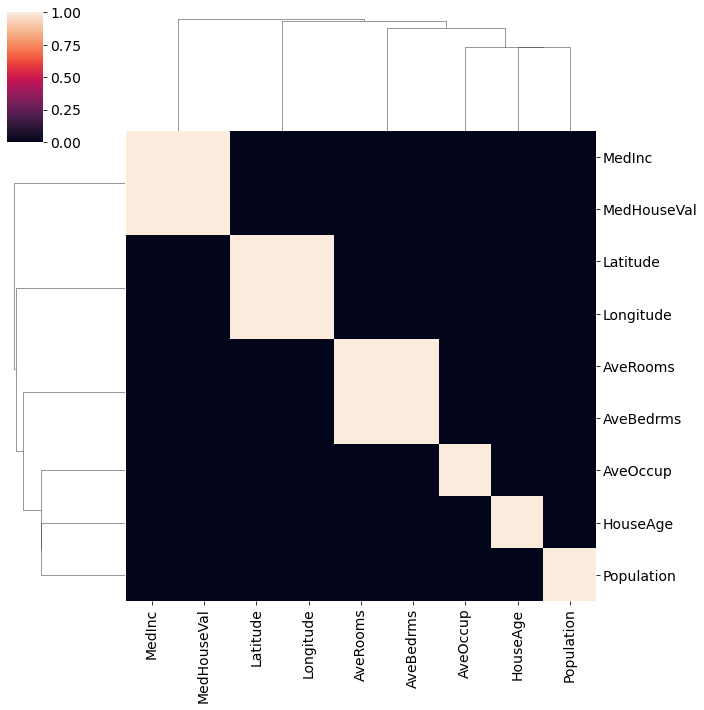

In [21]:
sns.clustermap(pd.concat([features, target], axis=1).corr().abs() > 0.6);

### Построение полной модели

*Не забываем провести стандартизацию*

In [22]:
X = sm.add_constant(features)
model = sm.OLS(target, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:02:54   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
results.params

const        -36.941920
MedInc         0.436693
HouseAge       0.009436
AveRooms      -0.107322
AveBedrms      0.645066
Population    -0.000004
AveOccup      -0.003787
Latitude      -0.421314
Longitude     -0.434514
dtype: float64

In [25]:
prediction_result = results.get_prediction(X)
target_pred = prediction_result.predicted_mean

In [26]:
prediction_result

In [27]:
X @ results.params # матричное умножение

0        4.131650
1        3.976606
2        3.676571
3        3.241598
4        2.413587
           ...   
20635    0.133656
20636    0.553528
20637    0.171251
20638    0.319105
20639    0.515804
Length: 20640, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


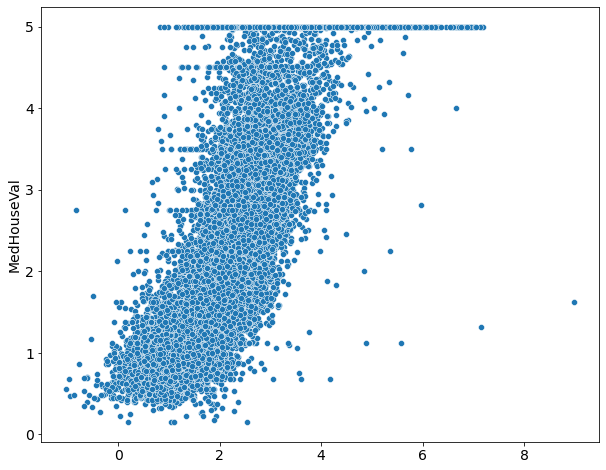

In [28]:
sns.scatterplot(target_pred, target);

In [29]:
def calculate_r2(target, prediction):
    r2 = 1 - np.power((target - prediction), 2).sum() \
         / np.power((target - target.mean()), 2).sum()

    return r2


def calculate_r2_adj(target, prediction, features):
    n, p = features.shape
    r2 = calculate_r2(target, prediction)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p)

    return r2_adj

In [30]:
calculate_r2(target, target_pred), calculate_r2_adj(target, target_pred, X)

(0.606232685199805, 0.606079995629818)

### Все-таки стандартизация

In [31]:
means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

scaled_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785


In [32]:
X = sm.add_constant(scaled_features)
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:02:55   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.005    410.326      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


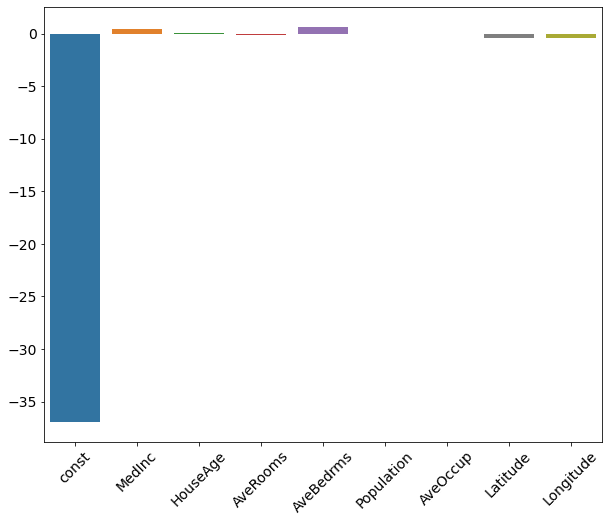

In [33]:
sns.barplot(results.params.index, results.params)
plt.xticks(rotation=45);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


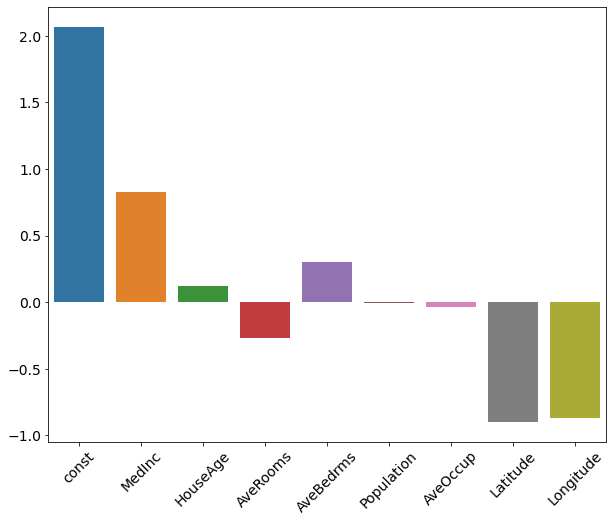

In [34]:
sns.barplot(results_scaled.params.index, results_scaled.params)
plt.xticks(rotation=45);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


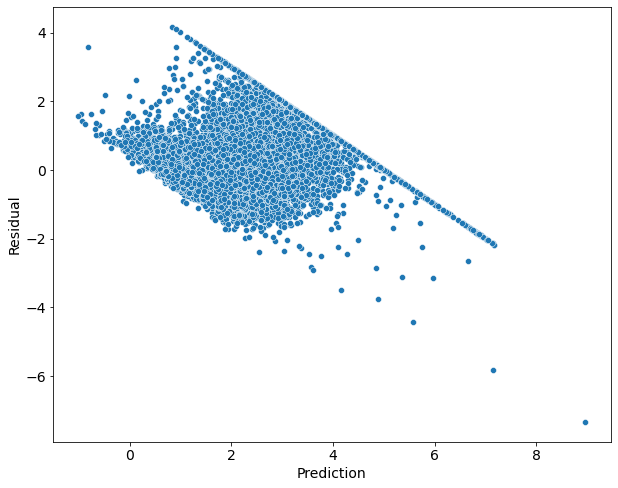

In [35]:
resid_full = target - target_pred
sns.scatterplot(target_pred, resid_full)
plt.xlabel("Prediction")
plt.ylabel("Residual");

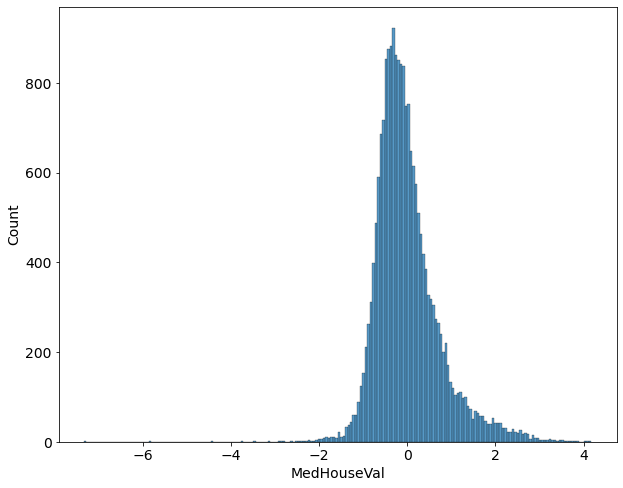

In [36]:
sns.histplot(resid_full);

Кажется, могут быть какие-то выбросы

### Расстояния Кука

In [37]:
influence = results_scaled.get_influence()
cooks = influence.cooks_distance
cooks

(array([1.62709718e-05, 1.63794627e-05, 3.01480334e-06, ...,
        5.69628235e-05, 2.67115417e-05, 1.36869265e-05]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [38]:
(cooks[1] < 0.05).sum()

2

In [39]:
X = X[cooks[1] >= 0.05]
target = target[cooks[1] >= 0.05]

In [40]:
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     4017.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:02:56   Log-Likelihood:                -22548.
No. Observations:               20638   AIC:                         4.511e+04
Df Residuals:                   20629   BIC:                         4.519e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0689      0.005    411.801      0.0

### VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,1.000128
1,MedInc,2.561594
2,HouseAge,1.242865
3,AveRooms,7.536472
4,AveBedrms,6.197788
5,Population,1.139469
6,AveOccup,1.007560
7,Latitude,9.297822
8,Longitude,8.966987


In [43]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data

In [44]:
model_updated = sm.OLS(target, X.drop(columns=["Latitude"]))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3507.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:04:20   Log-Likelihood:                -24151.
No. Observations:               20638   AIC:                         4.832e+04
Df Residuals:                   20630   BIC:                         4.838e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0688      0.005    381.029      0.0

In [45]:
calculate_vif(X.drop(columns=["Latitude"]))

,feature,VIF
0,const,1.000128
1,MedInc,2.137360
2,HouseAge,1.160198
3,AveRooms,6.825143
4,AveBedrms,5.942228
5,Population,1.127659
6,AveOccup,1.006835
7,Longitude,1.028786


In [46]:
model_updated = sm.OLS(target, X.drop(columns=["Latitude", "AveRooms"]))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3620.
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:07:00   Log-Likelihood:                -24818.
No. Observations:               20638   AIC:                         4.965e+04
Df Residuals:                   20631   BIC:                         4.971e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0684      0.006    368.855      0.0

In [47]:
calculate_vif(X.drop(columns=["Latitude", "AveRooms"]))

,feature,VIF
0,const,1.000124
1,MedInc,1.024120
2,HouseAge,1.141104
3,AveBedrms,1.027106
4,Population,1.122396
5,AveOccup,1.006213
6,Longitude,1.018048


### Сравним модели с помощью статистики

In [48]:
preds_full = results_scaled.get_prediction(X).predicted_mean
preds_updated = results_updated.get_prediction(X.drop(columns=["Latitude", "AveRooms"])).predicted_mean

In [49]:
errors_full = target - preds_full
errors_updated = target - preds_updated

Во-первых, сразу видно, что распределения остатков обоих моделей +- нормальные.

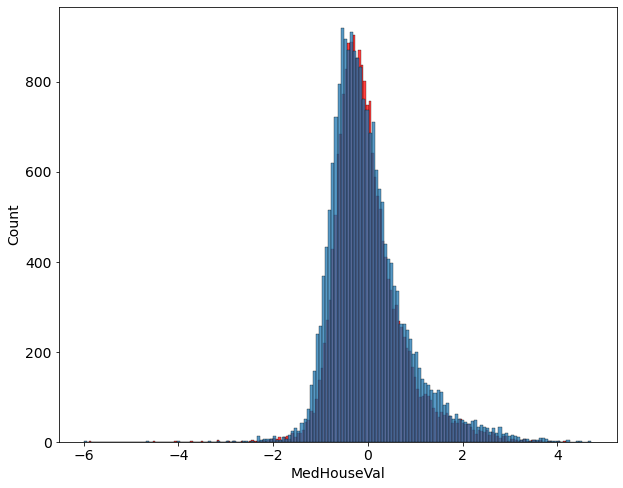

In [50]:
sns.histplot(errors_full, color="red")
sns.histplot(errors_updated);

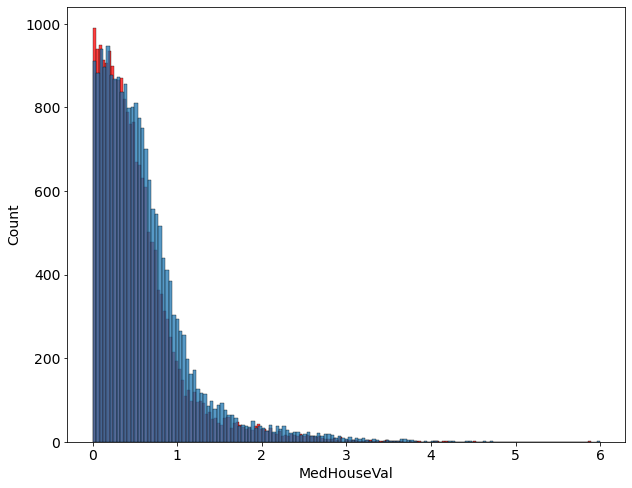

In [52]:
sns.histplot(errors_full.abs(), color="red")
sns.histplot(errors_updated.abs());

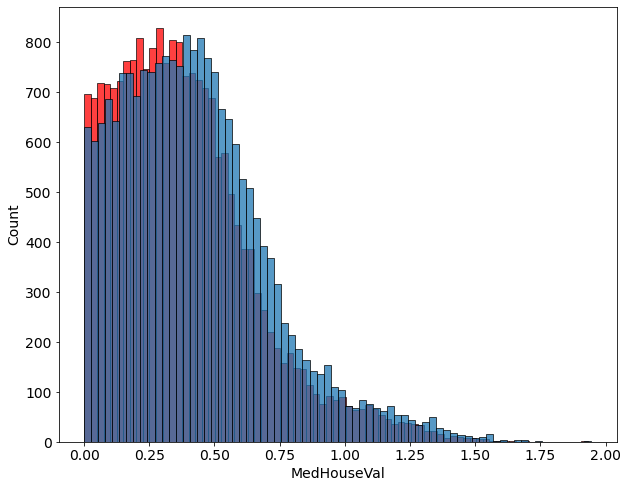

In [53]:
sns.histplot(np.log1p(errors_full.abs()), color="red")
sns.histplot(np.log1p(errors_updated.abs()));

In [56]:
mannwhitneyu(errors_full.abs(), errors_updated.abs(), alternative="less")

MannwhitneyuResult(statistic=194144921.0, pvalue=8.29179492125677e-55)

In [55]:
errors_full.abs().mean(), errors_updated.abs().mean()

(0.5292267989608106, 0.600328323791349)

Еще можно использовать библиотеку `sklearn`, но это скорее для ML, там проще интерфейс, но на выходе меньше информации.